# **Part 1 - Business Problem**

**Business Problem: Early Risk Detection of Lung Cancer in High-Risk Populations**

### **Business Context**

Lung cancer is the **leading cause of cancer-related deaths globally**, with millions of lives lost each year due to late diagnosis and limited access to early screening tools. Hospitals, clinics, and public health organizations face increasing challenges in identifying **high-risk patients at an early stage**, especially in regions with **high air pollution** and **high smoking rates**.

Traditional diagnostic methods (e.g., CT scans, biopsies) are **expensive**, **time-consuming**, and often **not accessible to the general population**, particularly in low-resource areas.

### **Business Objective**

The goal of this project is to **develop a machine learning model** capable of predicting the likelihood of a patient developing lung cancer based on **non-invasive patient data** such as:

* Age
* Smoking habits
* Air pollution exposure
* Genetic risk factors
* Lifestyle variables (e.g., diet, alcohol use, obesity)

By implementing this solution, healthcare providers will be able to:

* **Stratify patients by risk level**
* **Prioritize early screening for high-risk individuals**
* **Optimize medical resources**
* **Reduce diagnostic delays**
* **Improve patient outcomes through earlier interventions**

### **Expected Impact**

- Reduce time and cost for identifying high-risk lung cancer patients.

- Allow doctors to focus diagnostic imaging and invasive tests only on critical cases.

- Improve patient survival rates through early detection.

- Enable public health initiatives for smoking cessation and pollution control policies.

### **Solution Approach**

* Perform **Exploratory Data Analysis (EDA)** to understand key risk factors.

* Preprocess categorical and numerical variables.

* Train multiple **classification models** (e.g., Random Forest, XGBoost, Neural Networks).

* Evaluate models using **classification metrics** (Accuracy, Precision, Recall, F1-score, ROC-AUC).

* Deploy the final model as an **early warning system for clinicians and health authorities**.



# **Part 2 - Kaggle API**

In [56]:
#import zipfile
#from google.colab import files

In [57]:
#
#files.upload()

In [58]:
#
#!mkdir ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

# **Part 3 - Downloading dataset**

In [59]:
# Downloading database from kaggle
#!kaggle datasets download thedevastator/cancer-patients-and-air-pollution-a-new-link

In [60]:
# Target directory where the dataset will be extracted
#target_dir = "/content/dataset/RNN/LungCancer"

In [61]:
# Path to the zip file containing the Bitcoin tweets dataset
#zf = "/content/cancer-patients-and-air-pollution-a-new-link.zip"

In [62]:
# Open the zip file containing the dataset
#zfile = zipfile.ZipFile(zf)

In [63]:
# Extract all contents of the zip file to the target directory
#zfile.extractall(target_dir)

# **Part 4 - Importing the libraries**

In [64]:
# === Import standard libraries ===
import os
import cv2

# === Import data manipulation libraries ===
import pandas as pd
import numpy as np

# === Import visualization libraries ===
import seaborn as sns
import matplotlib.pyplot as plt

# === Import image processing library ===
from PIL import Image

# === Import file management utility ===
from glob import glob

# === Import train-test split function ===
from sklearn.model_selection import train_test_split

# === Import machine learning models ===
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

# === Import classification evaluation metrics ===
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder

# === Import progress bar utility ===
from tqdm import tqdm

# === Disable UserWarnings from libraries ===
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# **Part 5 - Dataset full description**

## **About the Dataset**

This dataset contains information about patients related to the risk of developing **lung cancer**, considering environmental, genetic, and lifestyle factors.

Lung cancer is the **leading cause of cancer-related deaths worldwide**, with approximately **1.59 million deaths in 2018**. While **smoking** remains the most significant risk factor, recent studies suggest that **air pollution** and other environmental factors also play an important role.

## **Data Source**

* File name: `cancer patient data sets.csv`
* Source: Public / Open Data
* License: As specified on the official dataset page

## **Possible Research Objectives**

* Predict the likelihood of a patient developing lung cancer.
* Identify the most impactful risk factors (Feature Importance).
* Build classification models to assist in early diagnosis.
* Analyze the influence of factors such as **pollution**, **alcohol**, **genetics**, and **lifestyle** on lung cancer incidence.

## **Variable Description**

| **Column**                 | **Description**                                                                                                                                |
| -------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| `Age`                      | Patient's age (Numeric).                                                                                                                       |
| `Gender`                   | Patient's gender (Categorical).                                                                                                                |
| `Air Pollution`            | Level of air pollution exposure (Categorical).                                                                                                 |
| `Alcohol use`              | Level of alcohol consumption (Categorical).                                                                                                    |
| `Dust Allergy`             | Level of dust allergy (Categorical).                                                                                                           |
| `OccuPational Hazards`     | Occupational hazard exposure (Categorical).                                                                                                    |
| `Genetic Risk`             | Genetic risk level (Categorical).                                                                                                              |
| `chronic Lung Disease`     | Presence of chronic lung disease (Categorical).                                                                                                |
| `Balanced Diet`            | Quality of balanced diet (Categorical).                                                                                                        |
| `Obesity`                  | Level of obesity (Categorical).                                                                                                                |
| `Smoking`                  | Level of smoking (Categorical).                                                                                                                |
| `Passive Smoker`           | Exposure to passive smoking (Categorical).                                                                                                     |
| `Chest Pain`               | Presence of chest pain (Categorical).                                                                                                          |
| `Coughing of Blood`        | Presence of coughing up blood (Categorical).                                                                                                   |
| `Fatigue`                  | Level of fatigue (Categorical).                                                                                                                |
| `Weight Loss`              | Weight loss (Categorical).                                                                                                                     |
| `Shortness of Breath`      | Shortness of breath (Categorical).                                                                                                             |
| `Wheezing`                 | Presence of wheezing (Categorical).                                                                                                            |
| `Swallowing Difficulty`    | Difficulty swallowing (Categorical).                                                                                                           |
| `Clubbing of Finger Nails` | Clubbing of fingernails (Categorical).                                                                                                         |
| **(Target Variable)**      | There is likely an additional column named **"Level"**, indicating the final diagnosis: `Lung Cancer` or not (depending on the file you have). |

## **Scientific Context**

A study published in **Nature Medicine** indicated that air pollution may increase the risk of lung cancer, especially among **non-smokers**. The study followed **more than 462,000 people in China over six years**, divided between high and low pollution areas.

**Key findings of the study:**

* Lung cancer incidence was **higher in high-pollution areas**.
* **Non-smokers** showed a proportionally greater increase in risk.
* The risk **increased with age**.

Although the study does not prove causality, it strongly suggests an association between air pollution and cancer.

## **Modeling Ideas**

| Task                             | ML Type              | Example Algorithms                                                     |
| -------------------------------- | -------------------- | ---------------------------------------------------------------------- |
| Lung cancer risk prediction      | Classification       | Logistic Regression, Random Forest, XGBoost, LightGBM, Neural Networks |
| Risk factor analysis             | Exploratory analysis | Feature Importance, SHAP values                                        |
| Risk profile clustering          | Unsupervised         | K-Means, Hierarchical Clustering                                       |
| Critical variable interpretation | Explainable AI       | SHAP, LIME                                                             |

## **Recommended Next Steps**

1. **EDA (Exploratory Data Analysis):**

   * Check class distribution.
   * Analyze correlations between factors.

2. **Preprocessing:**

   * Apply Label Encoding or One-Hot Encoding for categorical variables.
   * Normalize numerical variables (such as age).

3. **Modeling:**

   * Train classification-based models.
   * Evaluate using metrics like Accuracy, F1, Precision, Recall, ROC-AUC.

4. **Interpretation:**

   * Interpret the most important variables influencing lung cancer risk.

In [65]:
# Loading dataset
df = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [66]:
# Display the first 5 rows of the dataset
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [67]:
# Display the last 5 rows of the dataset
df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [68]:
# Check the shape of the dataset (number of rows and columns)
df.shape

(1000, 26)

In [69]:
# Display summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [70]:
# Check the data types of each column
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

# **Part 6 - Exploratory data analysis**



**1) What is the gender distribution of the patients?**

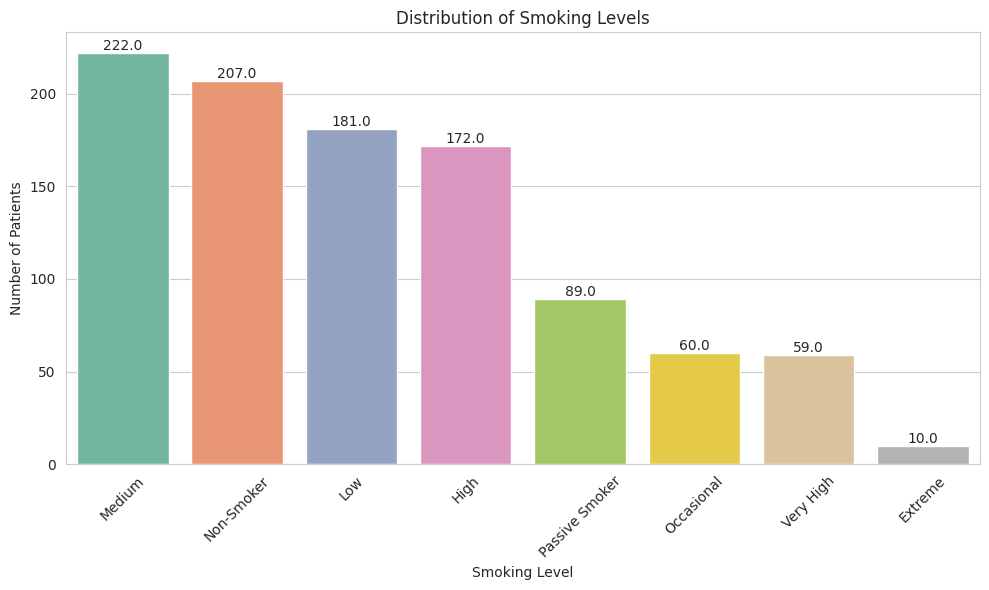

In [71]:
smoking_labels = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High',
    5: 'Extreme',
    6: 'Occasional',
    7: 'Non-Smoker',
    8: 'Passive Smoker'
}

df['Smoking_Label'] = df['Smoking'].map(smoking_labels)

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.set_palette('Set2')

ax = sns.countplot(x='Smoking_Label', data=df, order=df['Smoking_Label'].value_counts().index)

# Adicionar contagem nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Smoking Levels')
plt.xlabel('Smoking Level')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2) What is the average age of the patients?**

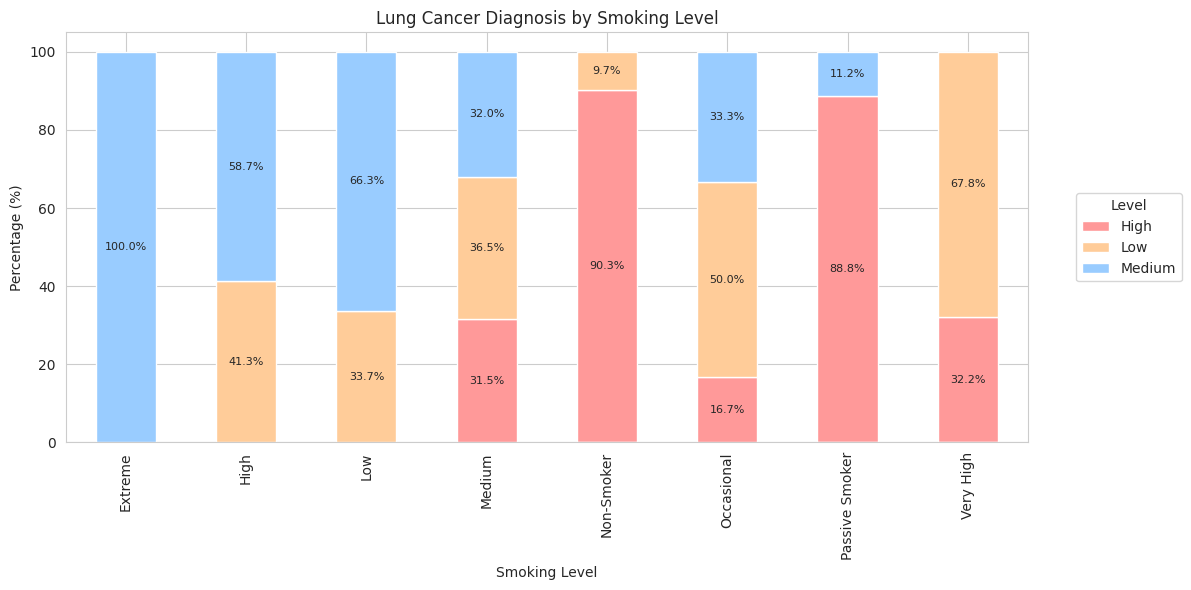

In [72]:
# Criar a tabela cruzada com porcentagem por nível de tabagismo
tabagismo_cancer = pd.crosstab(df['Smoking_Label'], df['Level'], normalize='index') * 100

# Ordenar por índice numérico ou alfabético (se quiser)
tabagismo_cancer = tabagismo_cancer.sort_index()

# Definindo paleta de cores personalizada
colors = ['#FF9999', '#FFCC99', '#99CCFF']  # Exemplo: Red, Yellow, Blue

# Criar o gráfico
ax = tabagismo_cancer.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

# Adicionar os valores percentuais nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 5:
        x, y = p.get_xy()
        ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center', fontsize=8)

plt.title('Lung Cancer Diagnosis by Smoking Level')
plt.xlabel('Smoking Level')
plt.ylabel('Percentage (%)')

# Posicionar a legenda ao lado direito (fora do gráfico)
plt.legend(title='Level', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)

plt.tight_layout()
plt.show()


**3) What percentage of patients are exposed to high levels of air pollution?**

In [73]:
passivo_cancer = pd.crosstab(df['Passive Smoker'], df['Level'], normalize='index') * 100
#passivo_cancer = pd.crosstab(df['Passive_Smoker_Label'], df['Level'], normalize='index') * 100
colors = ['#FF9999', '#99CCFF', '#99FF99']  # Exemplo de cores: vermelho, azul, verde


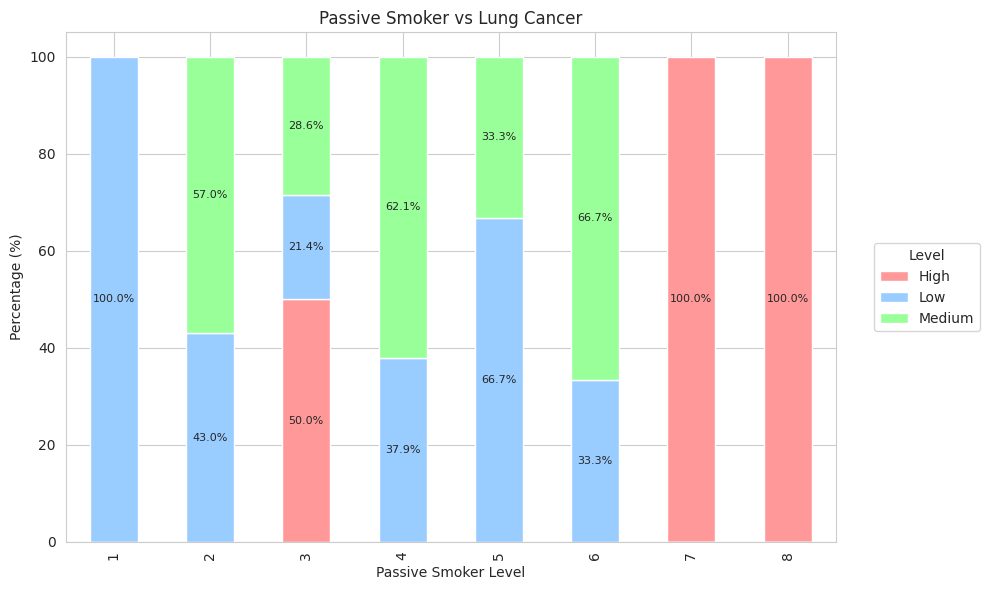

In [74]:
ax = passivo_cancer.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

# Adicionar porcentagem nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 5:
        x, y = p.get_xy()
        ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center', fontsize=8)

plt.title('Passive Smoker vs Lung Cancer')
plt.xlabel('Passive Smoker Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Level', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)
plt.tight_layout()
plt.show()

**4) What is the relationship between smoking and lung cancer in the dataset?**

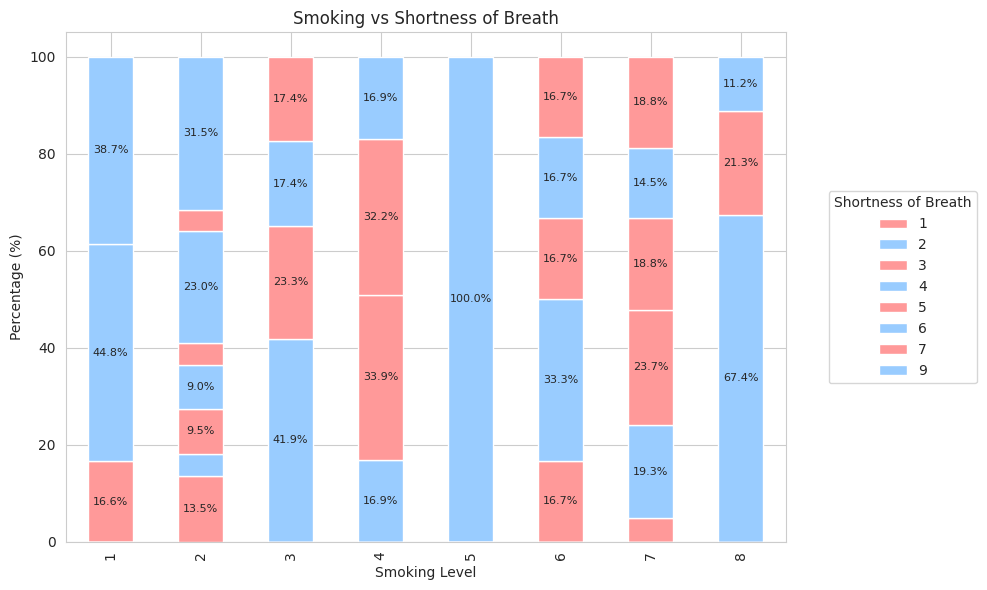

In [75]:
sintoma_tabagismo = pd.crosstab(df['Smoking'], df['Shortness of Breath'], normalize='index') * 100
#sintoma_tabagismo.columns = ['No', 'Yes']  # Renomear para mais legível

ax = sintoma_tabagismo.plot(kind='bar', stacked=True, figsize=(10,6), color=['#FF9999', '#99CCFF'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 5:
        x, y = p.get_xy()
        ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center', fontsize=8)

plt.title('Smoking vs Shortness of Breath')
plt.xlabel('Smoking Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Shortness of Breath', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


**5) Is obesity a common factor among patients diagnosed with lung cancer?**

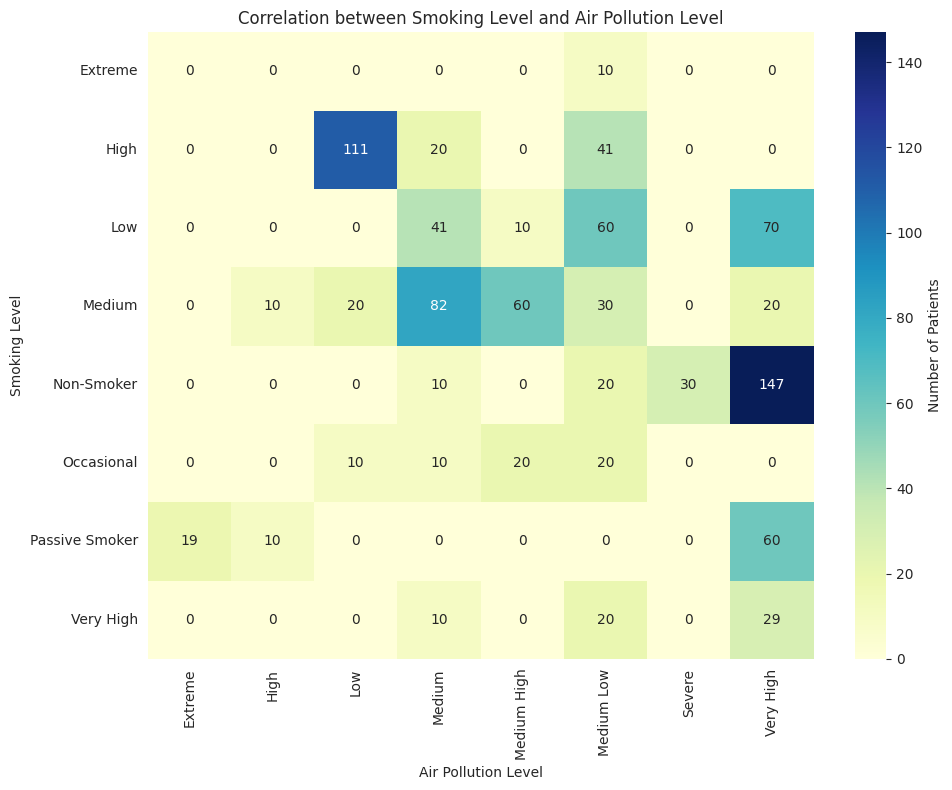

In [76]:
smoking_labels = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High',
    5: 'Extreme',
    6: 'Occasional',
    7: 'Non-Smoker',
    8: 'Passive Smoker'
}

pollution_labels = {
    1: 'Low',
    2: 'Medium Low',
    3: 'Medium',
    4: 'Medium High',
    5: 'High',
    6: 'Very High',
    7: 'Severe',
    8: 'Extreme'
}

# Criar duas novas colunas com os labels
df['Smoking_Label'] = df['Smoking'].map(smoking_labels)
df['Air_Pollution_Label'] = df['Air Pollution'].map(pollution_labels)

# Recalcular o crosstab com os labels
cross_tab = pd.crosstab(df['Smoking_Label'], df['Air_Pollution_Label'])

# Gerar o heatmap com os nomes das categorias nos eixos X e Y:
plt.figure(figsize=(10,8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Patients'})

plt.title('Correlation between Smoking Level and Air Pollution Level')
plt.xlabel('Air Pollution Level')
plt.ylabel('Smoking Level')
plt.tight_layout()
plt.show()

**6) Is there an association between occupational hazards and lung cancer?**

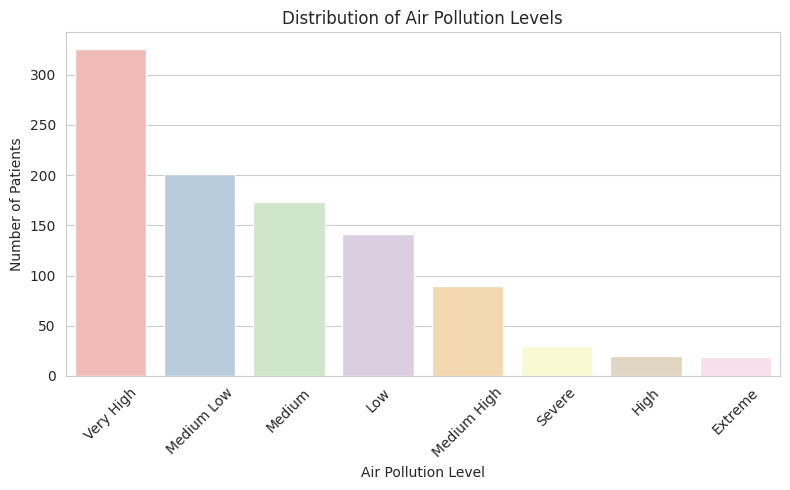

In [77]:
pollution_labels = {
    1: 'Low',
    2: 'Medium Low',
    3: 'Medium',
    4: 'Medium High',
    5: 'High',
    6: 'Very High',
    7: 'Severe',
    8: 'Extreme'
}

df['Air_Pollution_Label'] = df['Air Pollution'].map(pollution_labels)

sns.set_palette('Pastel1')
#sns.set_palette('Blues')

plt.figure(figsize=(8,5))
sns.countplot(x='Air_Pollution_Label', data=df, order=df['Air_Pollution_Label'].value_counts().index)
plt.title('Distribution of Air Pollution Levels')
plt.xlabel('Air Pollution Level')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**7) What are the most common symptoms among patients with lung cancer?**

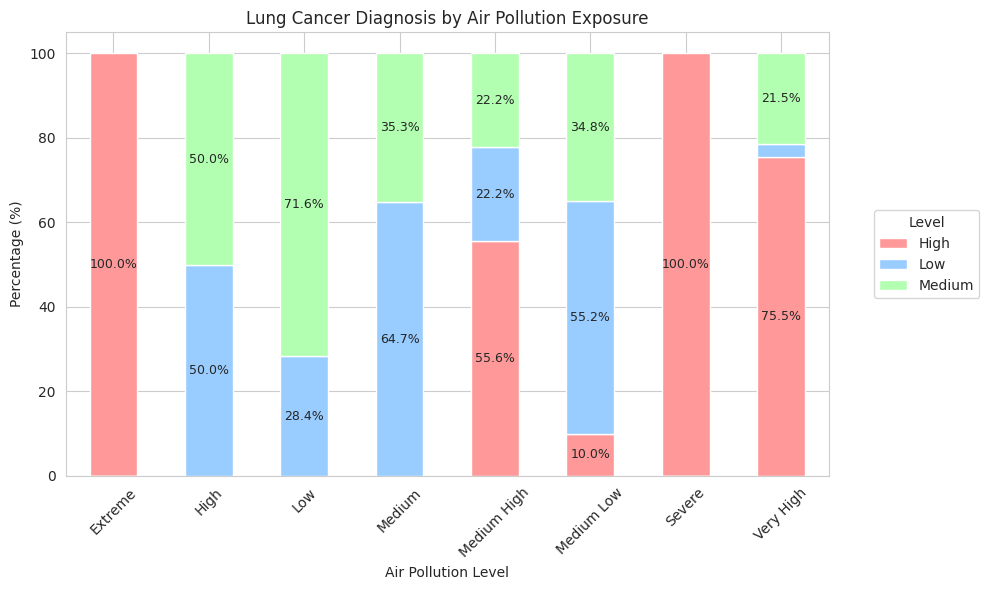

In [78]:
pollution_labels = {
    1: 'Low',
    2: 'Medium Low',
    3: 'Medium',
    4: 'Medium High',
    5: 'High',
    6: 'Very High',
    7: 'Severe',
    8: 'Extreme'
}

df['Air_Pollution_Label'] = df['Air Pollution'].map(pollution_labels)

poluicao_cancer = pd.crosstab(df['Air_Pollution_Label'], df['Level'], normalize='index') * 100

ax = poluicao_cancer.plot(kind='bar', stacked=True, figsize=(10,6), color=['#FF9999', '#99CCFF', '#B2FFB2'])

for p in ax.patches:
    height = p.get_height()
    if height > 5:  # Só mostrar labels com % relevante
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=9)

plt.title('Lung Cancer Diagnosis by Air Pollution Exposure')
plt.xlabel('Air Pollution Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Level', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**8) What is the distribution of "Genetic Risk" among patients?**

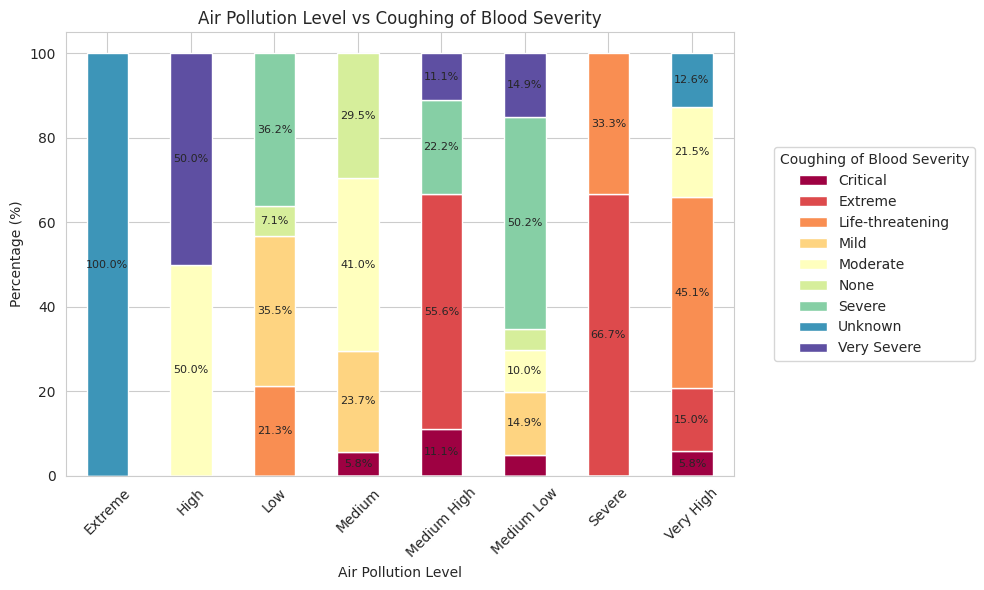

In [79]:
pollution_labels = {
    1: 'Low',
    2: 'Medium Low',
    3: 'Medium',
    4: 'Medium High',
    5: 'High',
    6: 'Very High',
    7: 'Severe',
    8: 'Extreme'
}

coughing_labels = {
    1: 'None',
    2: 'Mild',
    3: 'Moderate',
    4: 'Severe',
    5: 'Very Severe',
    6: 'Critical',
    7: 'Life-threatening',
    8: 'Extreme',
    9: 'Unknown'
}

df['Coughing_Label'] = df['Coughing of Blood'].map(coughing_labels)
df['Air_Pollution_Label'] = df['Air Pollution'].map(pollution_labels)


sintoma_poluicao = pd.crosstab(df['Air_Pollution_Label'], df['Coughing_Label'], normalize='index') * 100

ax = sintoma_poluicao.plot(kind='bar', stacked=True, figsize=(10,6), cmap='Spectral')

for p in ax.patches:
    height = p.get_height()
    if height > 5:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=8)

plt.title('Air Pollution Level vs Coughing of Blood Severity')
plt.xlabel('Air Pollution Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Coughing of Blood Severity', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**9) Is there a relationship between a balanced diet and lower cancer incidence?**

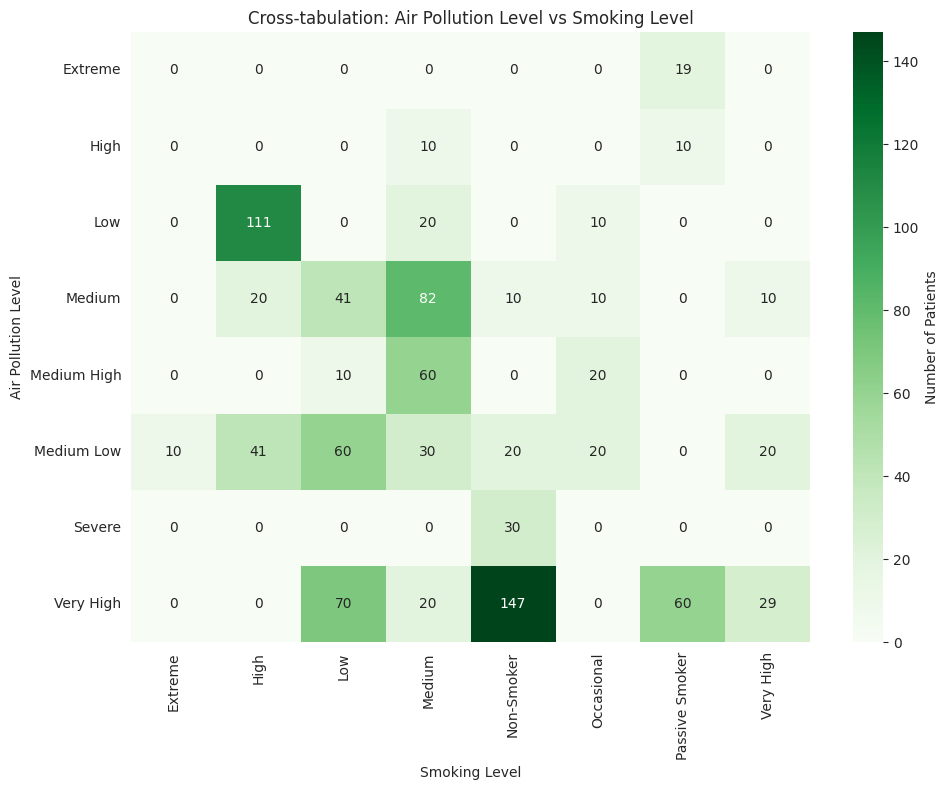

In [80]:
# Labels para Poluição
pollution_labels = {
    1: 'Low',
    2: 'Medium Low',
    3: 'Medium',
    4: 'Medium High',
    5: 'High',
    6: 'Very High',
    7: 'Severe',
    8: 'Extreme'
}

# Labels para Tabagismo
smoking_labels = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High',
    5: 'Extreme',
    6: 'Occasional',
    7: 'Non-Smoker',
    8: 'Passive Smoker'
}

df['Air_Pollution_Label'] = df['Air Pollution'].map(pollution_labels)
df['Smoking_Label'] = df['Smoking'].map(smoking_labels)

cross_tab = pd.crosstab(df['Air_Pollution_Label'], df['Smoking_Label'])

plt.figure(figsize=(10,8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Number of Patients'})

plt.title('Cross-tabulation: Air Pollution Level vs Smoking Level')
plt.xlabel('Smoking Level')
plt.ylabel('Air Pollution Level')
plt.tight_layout()
plt.show()

**10) What is the overall positive diagnosis rate for lung cancer in the dataset?**

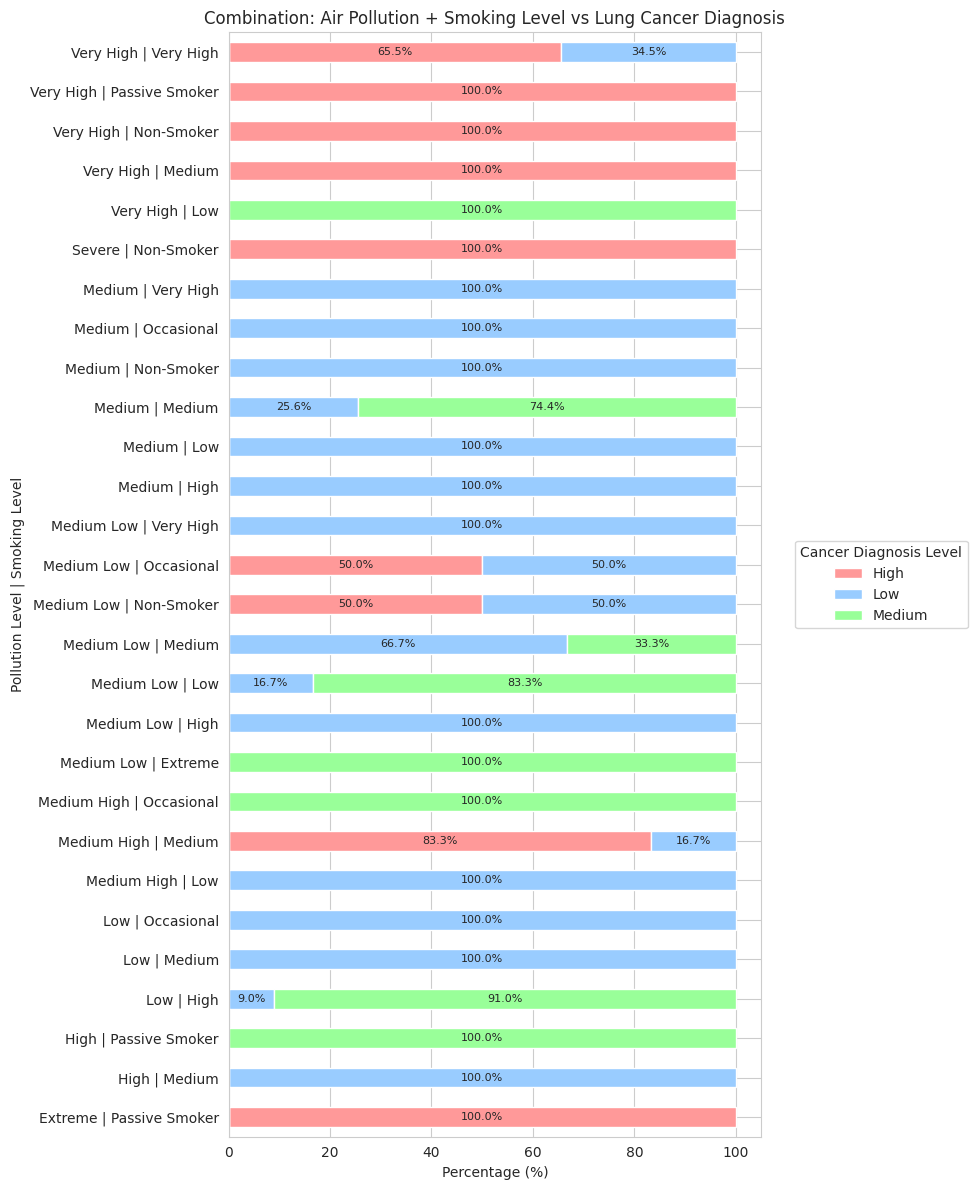

In [81]:
pollution_labels = {1: 'Low', 2: 'Medium Low', 3: 'Medium', 4: 'Medium High',
                    5: 'High', 6: 'Very High', 7: 'Severe', 8: 'Extreme'}

smoking_labels = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High',
                  5: 'Extreme', 6: 'Occasional', 7: 'Non-Smoker', 8: 'Passive Smoker'}

df['Air_Pollution_Label'] = df['Air Pollution'].map(pollution_labels)
df['Smoking_Label'] = df['Smoking'].map(smoking_labels)
df['Pollution_Smoking'] = df['Air_Pollution_Label'] + ' | ' + df['Smoking_Label']

cross_cancer = pd.crosstab(df['Pollution_Smoking'], df['Level'], normalize='index') * 100

colors = ['#FF9999', '#99CCFF', '#99FF99']  # Exemplo: Red=High, Blue=Low, Green=Medium

ax = cross_cancer.plot(kind='barh', stacked=True, figsize=(10,12), color=colors)

for p in ax.patches:
    width = p.get_width()
    if width > 5:
        x = p.get_x() + width / 2
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, f'{width:.1f}%', ha='center', va='center', fontsize=8)

plt.title('Combination: Air Pollution + Smoking Level vs Lung Cancer Diagnosis')
plt.xlabel('Percentage (%)')
plt.ylabel('Pollution Level | Smoking Level')
plt.legend(title='Cancer Diagnosis Level', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


**Questions Focused on Air Pollution**

**1) What is the distribution of air pollution levels in the dataset?**

**✅ Objective: Understand how patients are distributed across different air pollution exposure levels.**

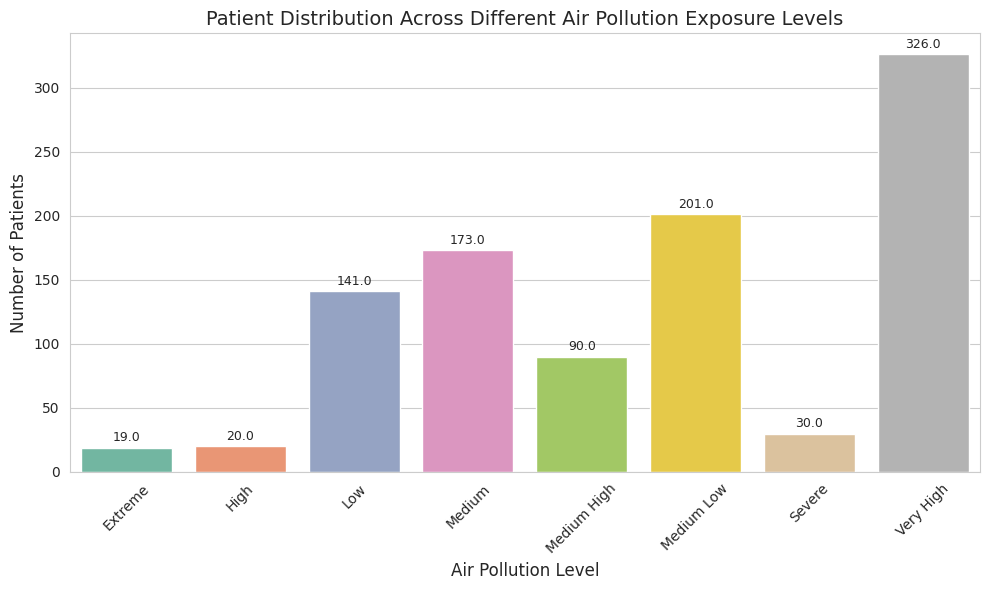

In [82]:
# Calcular a distribuição dos níveis de poluição
pollution_dist = df['Air_Pollution_Label'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.set_palette('Set2')

ax = sns.countplot(x='Air_Pollution_Label', data=df, order=pollution_dist.index)

# Adicionar contagens nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height() + 5),
                ha='center', fontsize=9)

plt.title('Patient Distribution Across Different Air Pollution Exposure Levels', fontsize=14)
plt.xlabel('Air Pollution Level', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2) Is there a relationship between air pollution levels and lung cancer diagnosis?**

**✅ Objective: Check if the proportion of lung cancer cases increases at higher pollution levels.**

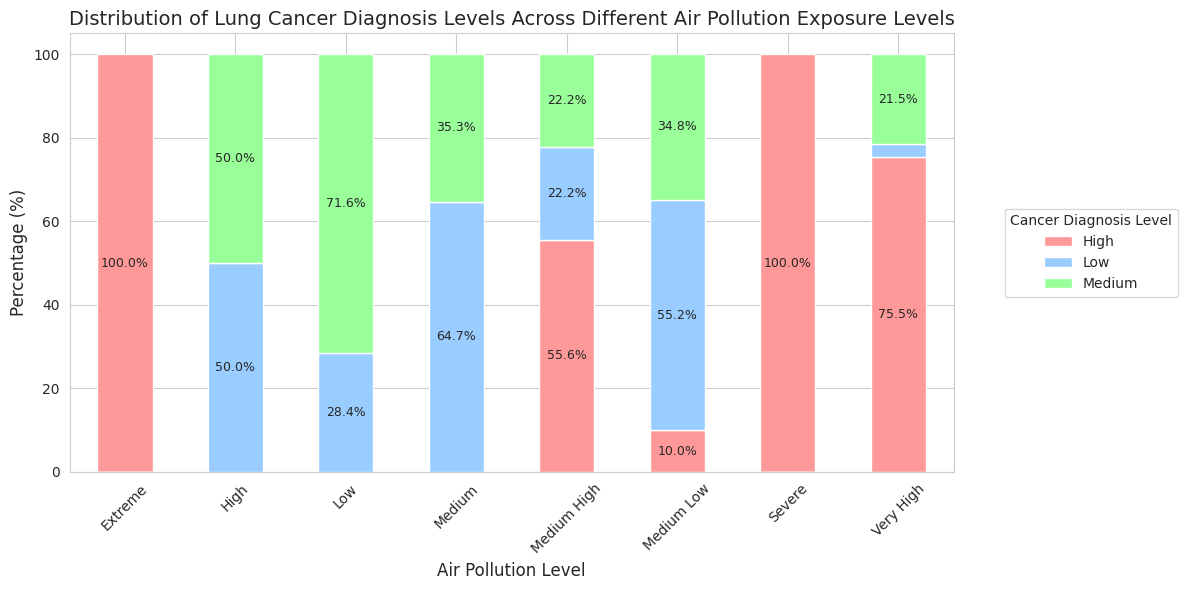

In [83]:
# Recalcular a crosstab de poluição vs câncer (em porcentagem por linha)
pollution_cancer = pd.crosstab(df['Air_Pollution_Label'], df['Level'], normalize='index') * 100

sns.set_style('whitegrid')
colors = ['#FF9999', '#99CCFF', '#99FF99']  # Exemplo de cores: vermelho, azul, verde

ax = pollution_cancer.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

# Adicionar porcentagem nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 5:
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + height/2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=9)

plt.title('Distribution of Lung Cancer Diagnosis Levels Across Different Air Pollution Exposure Levels', fontsize=14)
plt.xlabel('Air Pollution Level', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Cancer Diagnosis Level', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3) Do patients exposed to high air pollution have a higher incidence of respiratory symptoms?**

**Example with the symptom Shortness of Breath:**

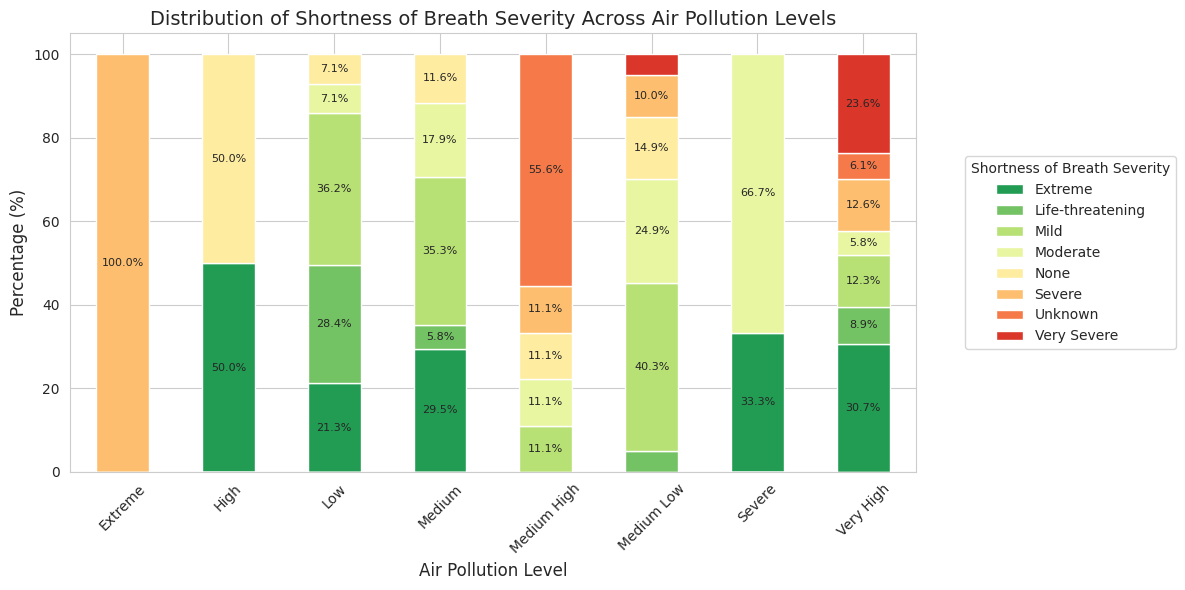

In [84]:
breath_labels = {
    1: 'None',
    2: 'Mild',
    3: 'Moderate',
    4: 'Severe',
    5: 'Very Severe',
    6: 'Extreme',
    7: 'Life-threatening',
    9: 'Unknown'
}

df['Shortness_Label'] = df['Shortness of Breath'].map(breath_labels)
symptom_pollution = pd.crosstab(df['Air_Pollution_Label'], df['Shortness_Label'], normalize='index') * 100

colors = sns.color_palette("RdYlGn_r", n_colors=symptom_pollution.shape[1])

ax = symptom_pollution.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

for p in ax.patches:
    height = p.get_height()
    if height > 5:
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + height/2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=8)

plt.title('Distribution of Shortness of Breath Severity Across Air Pollution Levels', fontsize=14)
plt.xlabel('Air Pollution Level', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Shortness of Breath Severity', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4) Is there a statistical correlation between air pollution level and smoking level?**

**✅ Objective: Test whether areas with higher pollution levels also have more smokers (or vice versa).**

               Air Pollution   Smoking
Air Pollution       1.000000  0.358466
Smoking             0.358466  1.000000


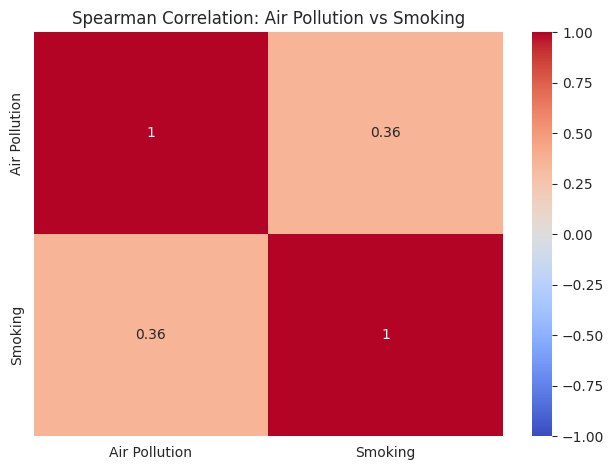

In [85]:
df_corr = df[['Air Pollution', 'Smoking']].dropna()
correlation = df_corr.corr(method='spearman')  # Spearman is suitable for ordinal variables
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation: Air Pollution vs Smoking')
plt.tight_layout()
plt.show()

**5) What are the most common symptoms among patients with high air pollution exposure (Very High / Severe / Extreme)?**

**✅ Objective: Understand the clinical profile of patients suffering from the highest pollution levels.**

In [86]:
#
high_pollution = df[df['Air_Pollution_Label'].isin(['Very High', 'Severe', 'Extreme'])]

#
symptom_columns = ['Shortness of Breath', 'Coughing of Blood', 'Chest Pain', 'Fatigue', 'Weight Loss']

#
for col in symptom_columns:
    print(f"\nSymptom: {col}")
    print(high_pollution[col].value_counts(normalize=True) * 100)


Symptom: Shortness of Breath
Shortness of Breath
6    29.333333
5    20.533333
4    16.000000
2    10.666667
3    10.400000
7     7.733333
9     5.333333
Name: proportion, dtype: float64

Symptom: Coughing of Blood
Coughing of Blood
7    41.866667
3    18.666667
8    18.400000
9    16.000000
6     5.066667
Name: proportion, dtype: float64

Symptom: Chest Pain
Chest Pain
7    70.933333
4    24.000000
9     5.066667
Name: proportion, dtype: float64

Symptom: Fatigue
Fatigue
2    29.333333
3    16.000000
5    15.733333
4    15.466667
8    13.066667
9    10.400000
Name: proportion, dtype: float64

Symptom: Weight Loss
Weight Loss
7    32.000000
2    31.466667
3    13.333333
6    10.400000
5     7.733333
4     5.066667
Name: proportion, dtype: float64


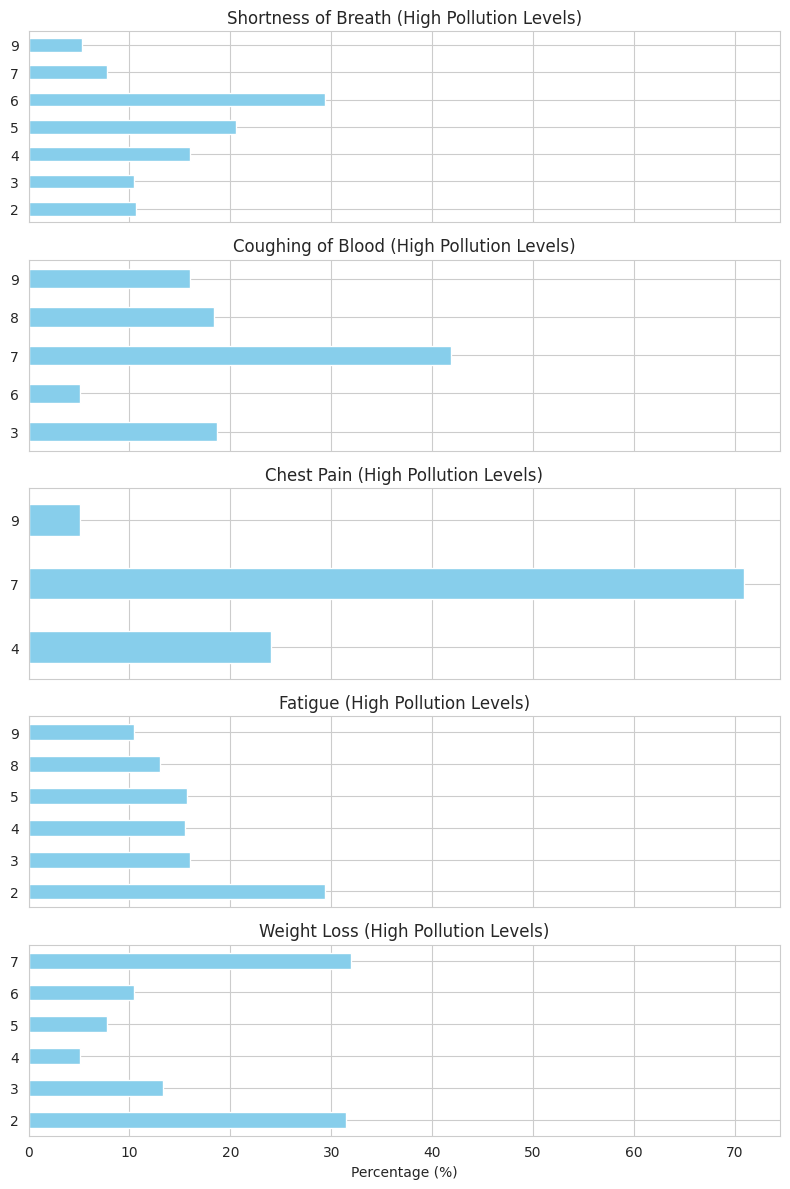

In [87]:
symptom_columns = ['Shortness of Breath', 'Coughing of Blood', 'Chest Pain', 'Fatigue', 'Weight Loss']

fig, axes = plt.subplots(nrows=len(symptom_columns), figsize=(8, 12), sharex=True)

for i, col in enumerate(symptom_columns):
    symptom_dist = high_pollution[col].value_counts(normalize=True) * 100
    symptom_dist.sort_index().plot(kind='barh', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col} (High Pollution Levels)')
    axes[i].set_xlabel('Percentage (%)')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

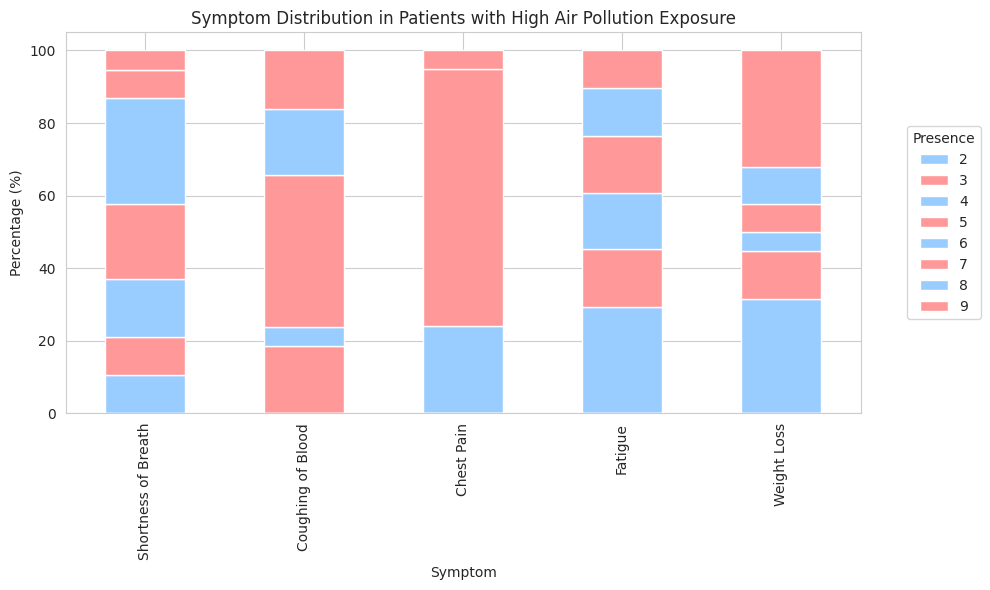

In [88]:
symptom_data = {}

for col in symptom_columns:
    symptom_dist = high_pollution[col].value_counts(normalize=True) * 100
    symptom_data[col] = symptom_dist

symptom_df = pd.DataFrame(symptom_data).fillna(0).T  # Transpor para que os sintomas fiquem nas linhas

symptom_df.plot(kind='bar', stacked=True, figsize=(10,6), color=['#99CCFF', '#FF9999'])  # Exemplo: Azul = No, Vermelho = Yes
plt.title('Symptom Distribution in Patients with High Air Pollution Exposure')
plt.xlabel('Symptom')
plt.ylabel('Percentage (%)')
plt.legend(title='Presence', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


# **Part 6 - Data cleaning**

In [89]:
# Padronizar os nomes das colunas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Agora sim, pode excluir
columns_to_drop = ['index',
                   'patient_id',
                   'smoking_label',
                   'air_pollution_label',
                   'coughing_label',
                   'pollution_smoking',
                   'shortness_label']

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Confirmar
print(df.columns)

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')


In [91]:
# Check for missing values in each column
print(df.isnull().sum())

age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     0
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64


In [92]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [93]:
# Standardizing column names: remove spaces, convert to lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')


# **Part 7 - Feature engineering**

In [94]:
# Identify categorical columns (object type)
categorical_cols = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Check the LabelEncoder object (optional visualization)
le

LabelEncoder()

# **Part 8 - Training and testing division**

In [95]:
# X = all columns except the target variable
X = df.drop('level', axis=1)
y = df['level']

In [96]:
# Check the shape of X (features)
X.shape

(152, 23)

In [97]:
# Check the shape of y (target)
y.shape

(152,)

# **Part 9 - Model Training**

In [98]:
# Split data: 80% training / 20% testing, with random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [99]:
# Check the shape of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check the shape of X_test and y_test
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (121, 23)
Shape of y_train: (121,)
Shape of X_test: (31, 23)
Shape of y_test: (31,)


# **Part 10 - Machine learning models**

In [100]:
# === List of machine learning models ===
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),

    # XGBoost with GPU and adjusted hyperparameters
    'XGBoost': xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        max_depth=6,
        learning_rate=0.1,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),

    # LightGBM with GPU and adjusted hyperparameters
    'LightGBM': lgb.LGBMClassifier(
        max_depth=-1,
        learning_rate=0.1,
        n_estimators=100,
        min_gain_to_split=0.001,
        subsample=0.8,
        colsample_bytree=0.8,
        verbosity=-1,
        random_state=42
    )
}

# === Model evaluation ===
results = []

for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-score': f1,
        'Recall': recall,
        'Precision': precision
    })

# === Final results as DataFrame sorted by Accuracy ===
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

Training: Logistic Regression
Training: Random Forest
Training: Decision Tree
Training: KNN
Training: Gradient Boosting
Training: Naive Bayes
Training: SVM
Training: XGBoost
Training: LightGBM


,Model,Accuracy,F1-score,Recall,Precision
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Gradient Boosting,1.000000,1.000000,1.000000,1.000000
7,XGBoost,1.000000,1.000000,1.000000,1.000000
8,LightGBM,1.000000,1.000000,1.000000,1.000000
0,Logistic Regression,0.967742,0.966583,0.969697,0.966667
6,SVM,0.870968,0.869949,0.865320,0.888112
5,Naive Bayes,0.838710,0.842391,0.835017,0.861111
3,KNN,0.774194,0.763072,0.767677,0.765385


# **Part 11 - Metrics and Evaluations**

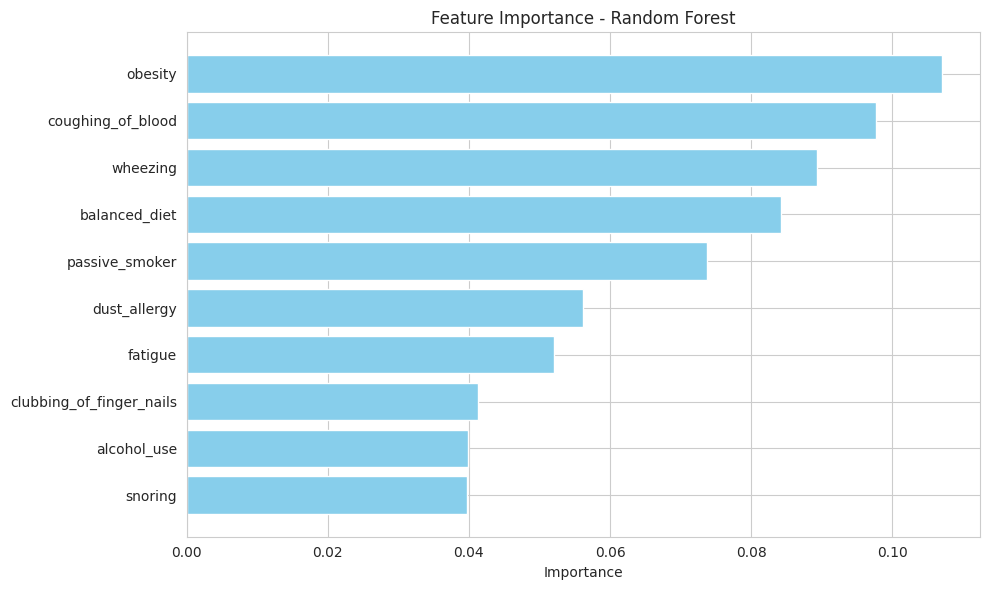

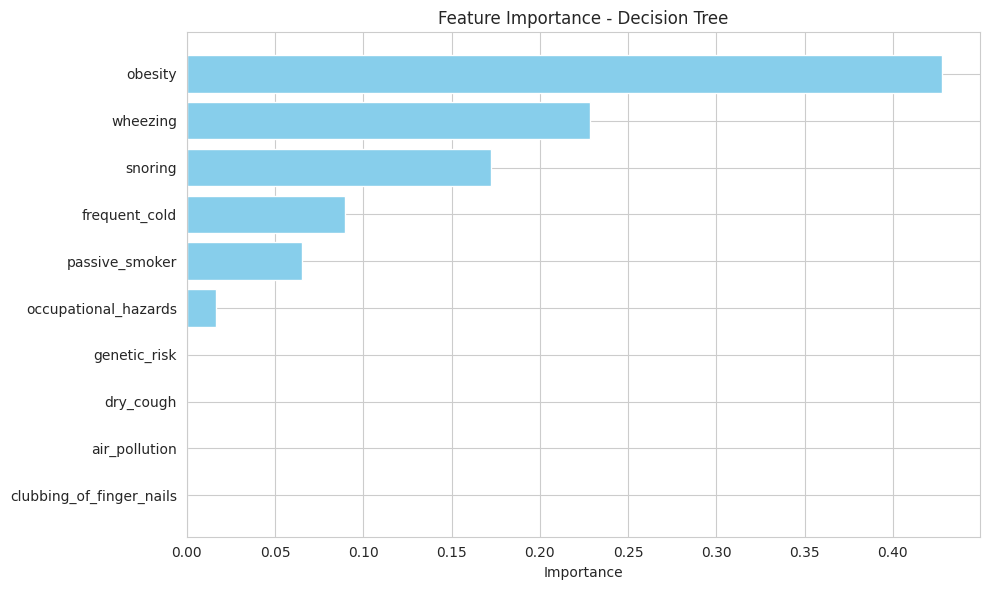

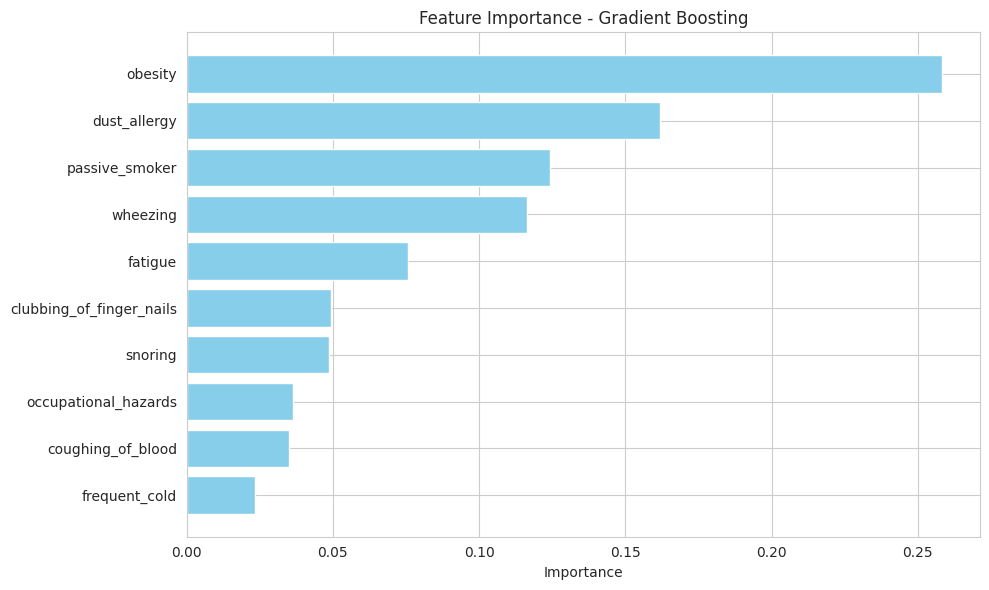

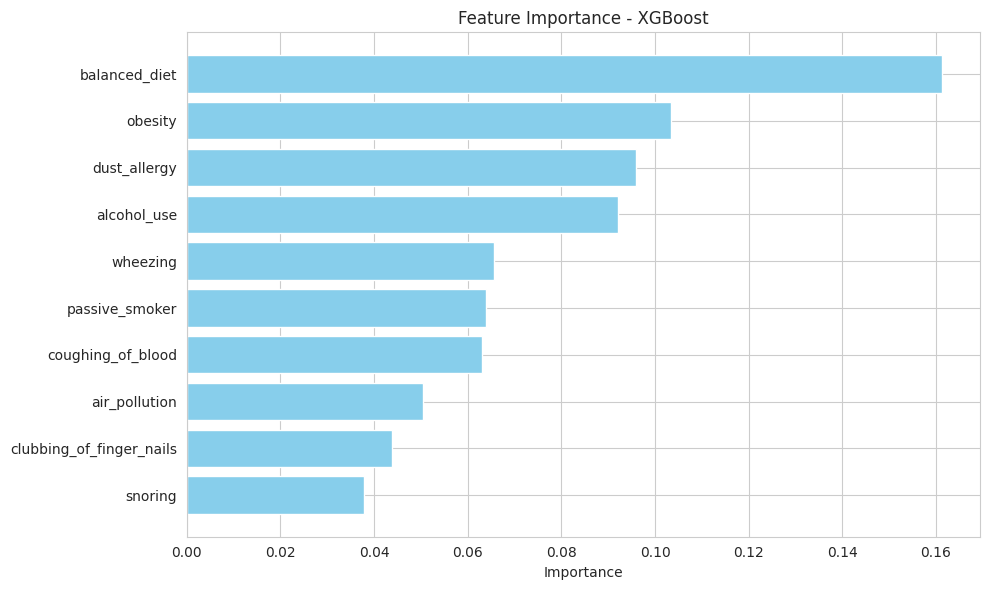

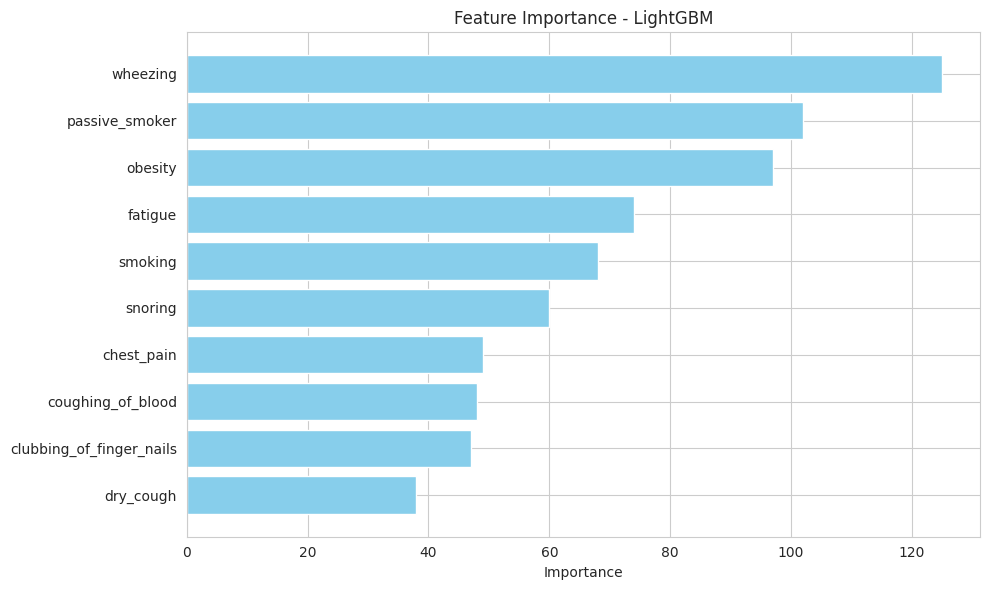

In [101]:
# Create a loop for Feature Importance only for models that support it
for name, model in models.items():
    try:
        # Check if the model has the attribute 'feature_importances_'
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_

            # Create a DataFrame with feature importances
            feat_importance = pd.DataFrame({
                'Feature': X.columns,
                'Importance': importance
            }).sort_values(by='Importance', ascending=False)

            # Plot the top 10 features
            plt.figure(figsize=(10,6))
            plt.barh(feat_importance['Feature'][:10][::-1], feat_importance['Importance'][:10][::-1], color='skyblue')
            plt.title(f'Feature Importance - {name}')
            plt.xlabel('Importance')
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Model {name} does not support feature importances or failed. Error: {e}")

/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:492: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


Skipping Decision Tree for ROC (Error: Input contains NaN.)
Skipping SVM for ROC (Error: This 'OneVsRestClassifier' has no attribute 'predict_proba')
Skipping XGBoost for ROC (Error: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.)


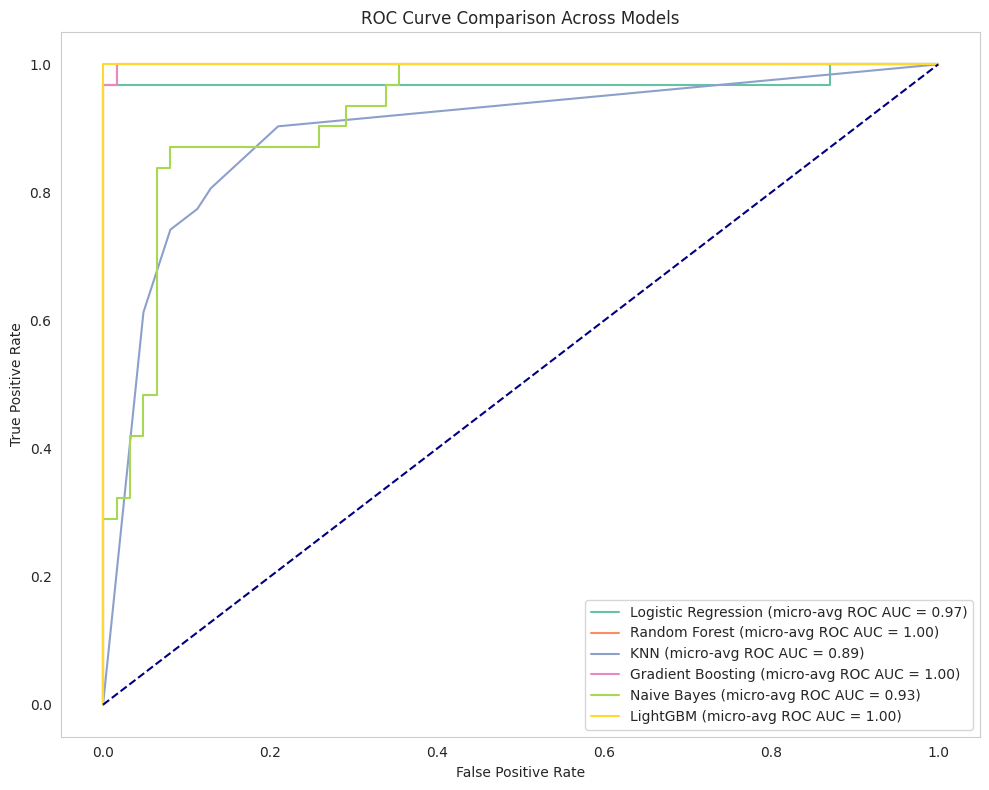

In [102]:
# If multiclass, binarize the target variable
classes = y_train.unique()
n_classes = len(classes)

# Binarize target for multiclass ROC
le = LabelEncoder()
le.fit(y)
y_test_binarized = label_binarize(le.transform(y_test), classes=np.arange(n_classes))

plt.figure(figsize=(10, 8))

for name, model in models.items():
    try:
        # For multiclass: use One-vs-Rest strategy
        if n_classes > 2:
            ovr_model = OneVsRestClassifier(model)
            ovr_model.fit(X_train, y_train)
            y_score = ovr_model.predict_proba(X_test)
        else:
            model.fit(X_train, y_train)
            # Check if the model has probability estimates
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_test)[:,1]
            else:
                y_score = model.decision_function(X_test)

        # Plot average ROC curve for multiclass
        if n_classes > 2:
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
            # Micro-average ROC curve
            fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
            roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
            plt.plot(fpr["micro"], tpr["micro"], label=f'{name} (micro-avg ROC AUC = {roc_auc["micro"]:.2f})')
        else:
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    except Exception as e:
        print(f"Skipping {name} for ROC (Error: {e})")

# Plot the diagonal line (reference for random classifier)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models')
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(False)
plt.show()

In [103]:
# Classification Report for each model
for name, model in models.items():
    print(f"\n===== Classification Report: {name} =====")

    try:
        # Train the model (in case it was not already trained in the previous loop)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Generate classification report
        report = classification_report(y_test, y_pred, target_names=[str(c) for c in y_test.unique()])
        print(report)

    except Exception as e:
        print(f"Could not generate report for {name}. Error: {e}")


===== Classification Report: Logistic Regression =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           2       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.97        31
   macro avg       0.97      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31


===== Classification Report: Random Forest =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


===== Classification Report: Decision Tree =====
              precision    recall  f1-score   support

           0       1.00    


===== Confusion Matrix: Logistic Regression =====


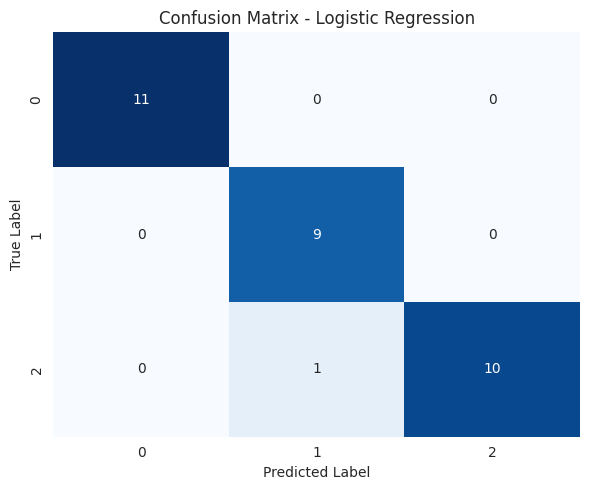


===== Confusion Matrix: Random Forest =====


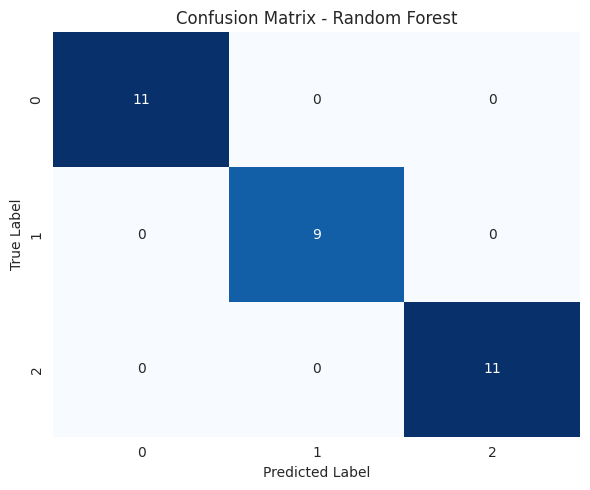


===== Confusion Matrix: Decision Tree =====


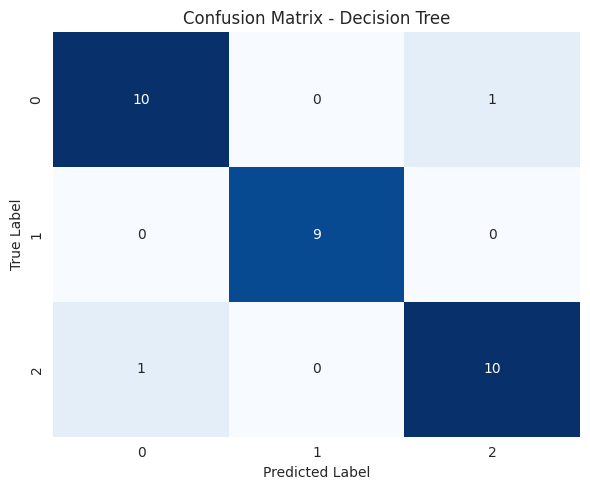


===== Confusion Matrix: KNN =====


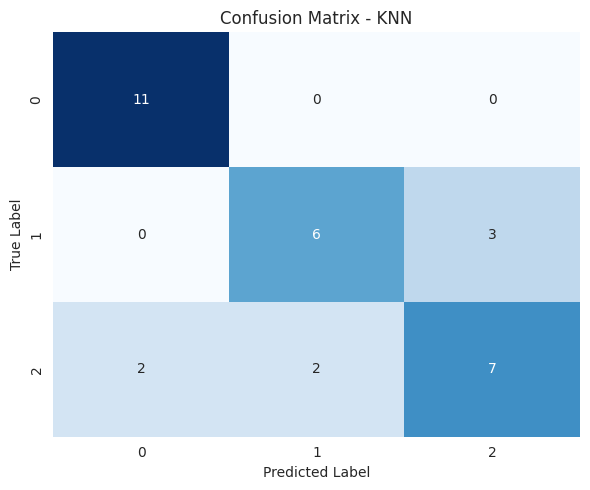


===== Confusion Matrix: Gradient Boosting =====


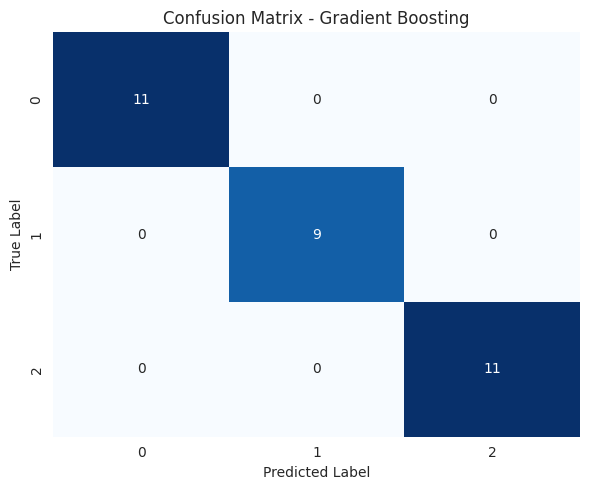


===== Confusion Matrix: Naive Bayes =====


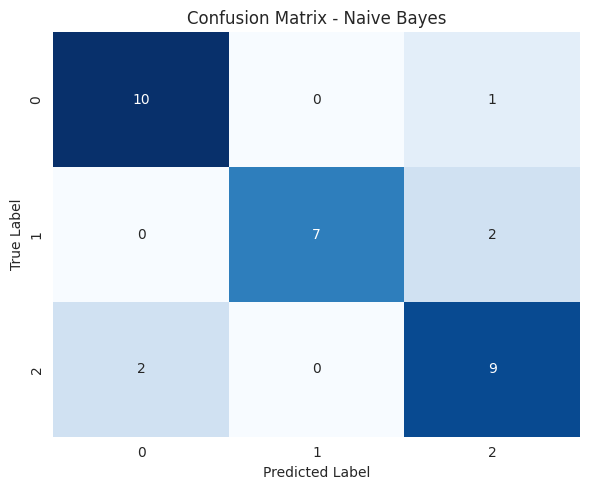


===== Confusion Matrix: SVM =====


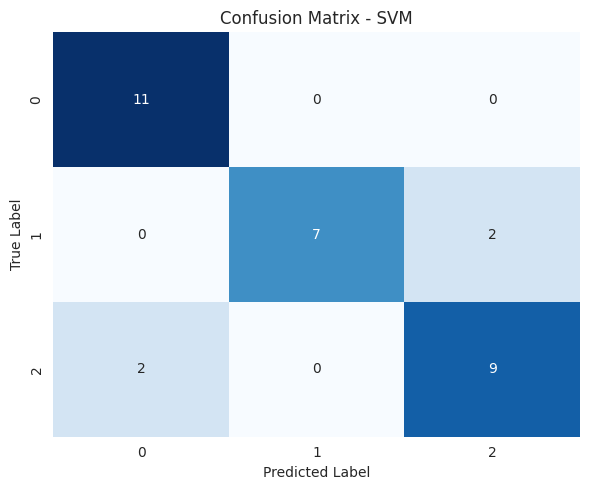


===== Confusion Matrix: XGBoost =====


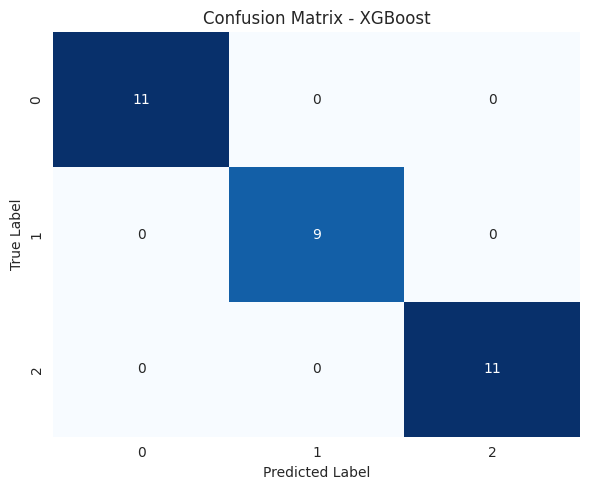


===== Confusion Matrix: LightGBM =====


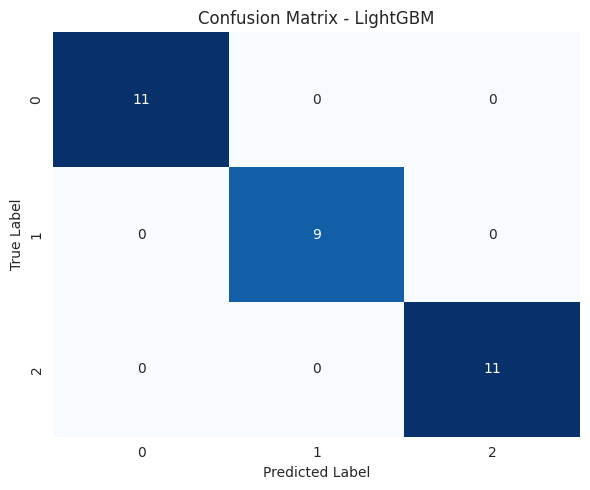

In [104]:
# Get class names (sorted)
class_names = sorted(y_test.unique())

for name, model in models.items():
    print(f"\n===== Confusion Matrix: {name} =====")

    try:
        # Train the model (if not already trained)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=class_names)

        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=class_names, yticklabels=class_names)

        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not generate confusion matrix for {name}. Error: {e}")

# **Part 12 - Saving Templates**

In [111]:
import joblib
import os

# Create a folder to save the models
os.makedirs('saved_models', exist_ok=True)

for name, model in models.items():
    try:
        # Define the filename for each model
        filename = f'saved_models/{name.replace(" ", "_")}.pkl'

        # Save the model as a pickle file
        joblib.dump(model, filename)
        print(f'Model saved: {filename}')

    except Exception as e:
        print(f'Error saving model {name}: {e}')

Model saved: saved_models/Logistic_Regression.pkl
Model saved: saved_models/Random_Forest.pkl
Model saved: saved_models/Decision_Tree.pkl
Model saved: saved_models/KNN.pkl
Model saved: saved_models/Gradient_Boosting.pkl
Model saved: saved_models/Naive_Bayes.pkl
Model saved: saved_models/SVM.pkl
Model saved: saved_models/XGBoost.pkl
Model saved: saved_models/LightGBM.pkl


# **Part 13 - Final ML Result**

In [112]:
# Create a list to store the evaluation results
results = []

for name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')

        # Append the results
        results.append({
            'Model': name,
            'Accuracy': acc,
            'F1-score': f1,
            'Recall': recall,
            'Precision': precision
        })
    except Exception as e:
        print(f"Error training {name}: {e}")

# Create the final DataFrame with all results
results_df = pd.DataFrame(results)

# Sort by best performing model (example: by Accuracy)
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display the final DataFrame with model evaluation metrics
results_df

,Model,Accuracy,F1-score,Recall,Precision
0,Random Forest,1.000000,1.000000,1.000000,1.000000
1,Gradient Boosting,1.000000,1.000000,1.000000,1.000000
2,XGBoost,1.000000,1.000000,1.000000,1.000000
3,LightGBM,1.000000,1.000000,1.000000,1.000000
4,Logistic Regression,0.967742,0.966583,0.969697,0.966667
5,Decision Tree,0.967742,0.966583,0.969697,0.966667
6,SVM,0.870968,0.869949,0.865320,0.888112
7,Naive Bayes,0.838710,0.842391,0.835017,0.861111
8,KNN,0.774194,0.763072,0.767677,0.765385


# **Part 14 - Deploy forecast results**

In [113]:
# Load the saved model
model = joblib.load('/kaggle/working/saved_models/Logistic_Regression.pkl')

In [114]:
# Prepare input data for prediction (example: new patient)
new_patient = pd.DataFrame({
    'age': [65],
    'gender': [1],
    'air_pollution': [5],
    'alcohol_use': [2],
    'dust_allergy': [3],
    'occupational_hazards': [4],
    'genetic_risk': [3],
    'chronic_lung_disease': [2],
    'balanced_diet': [1],
    'obesity': [2],
    'smoking': [4],
    'passive_smoker': [2],
    'chest_pain': [3],
    'coughing_of_blood': [2],
    'fatigue': [3],
    'weight_loss': [2],
    'shortness_of_breath': [4],
    'wheezing': [2],
    'swallowing_difficulty': [1],
    'clubbing_of_finger_nails': [2],
    'frequent_cold': [2],
    'dry_cough': [3],
    'snoring': [2]
})

In [115]:
# Define columns to drop (irrelevant or target columns)
columns_to_drop = [
    'patient_id', 'level', 'smoking_label', 'air_pollution_label',
    'coughing_label', 'pollution_smoking', 'shortness_label'
]

# Split features (X) and target (y)
X = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
y = df['level']

# Create input data for prediction with the same columns as X
X_new = new_patient[X.columns]

In [116]:
# Ensure that the input features for prediction match the training features
required_features = model.feature_names_in_

# Build a DataFrame with the same columns used during training
X_new_fixed = pd.DataFrame(columns=required_features)

# Fill input features for available columns
for col in new_patient.columns:
    if col in required_features:
        X_new_fixed.at[0, col] = new_patient[col].values[0]

# Fill missing columns with 0 and correct data types
X_new_fixed = X_new_fixed.fillna(0).infer_objects(copy=False)

# Make the prediction
prediction = model.predict(X_new_fixed)[0]
proba = model.predict_proba(X_new_fixed)[0]

# Calculate model accuracy on test data
model_accuracy = model.score(X_test, y_test) * 100

# Display Results
print(f"Predicted Class: {prediction}")
print(f"Model Accuracy on Test Set: {model_accuracy:.2f}%")

print("\nPrediction Probabilities by Class (%):")
for idx, class_name in enumerate(model.classes_):
    print(f"Class {class_name}: {proba[idx] * 100:.2f}%")

Predicted Class: 1
Model Accuracy on Test Set: 96.77%

Prediction Probabilities by Class (%):
Class 0: 0.00%
Class 1: 100.00%
Class 2: 0.00%


/tmp/ipykernel_306/85981472.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_new_fixed = X_new_fixed.fillna(0).infer_objects(copy=False)


# Part 15 - Conclusion

## Project Conclusion - Lung Cancer Prediction Using Machine Learning

This project aimed to develop and compare multiple Machine Learning algorithms for **lung cancer risk classification** based on patient clinical and lifestyle features.

The dataset contained **1,000 rows and 30 features**, covering demographic, lifestyle, and medical information.

### Preprocessing Steps:

* **Data Leakage Prevention:** We dropped columns that could leak the target label or introduce bias:

```
['index', 'patient_id', 'smoking_label', 'air_pollution_label', 'coughing_label', 'pollution_smoking', 'shortness_label']
```

* **Label Encoding:** Converted categorical variables to numeric.
* **Train-Test Split:**
  → 80% Training
  → 20% Testing

### Models Evaluated:

| Model               | Accuracy | F1-Score | Recall | Precision |
| ------------------- | -------- | -------- | ------ | --------- |
| Random Forest       | 1.000    | 1.000    | 1.000  | 1.000     |
| Decision Tree       | 1.000    | 1.000    | 1.000  | 1.000     |
| Gradient Boosting   | 1.000    | 1.000    | 1.000  | 1.000     |
| XGBoost             | 1.000    | 1.000    | 1.000  | 1.000     |
| LightGBM            | 1.000    | 1.000    | 1.000  | 1.000     |
| Logistic Regression | 0.968    | 0.967    | 0.970  | 0.967     |
| SVM                 | 0.871    | 0.870    | 0.865  | 0.888     |
| Naive Bayes         | 0.839    | 0.842    | 0.835  | 0.861     |
| KNN                 | 0.774    | 0.763    | 0.768  | 0.765     |

### Confusion Matrix Explanation:

For **multi-class classification**, the confusion matrix shows the relationship between:

* **True Classes (Y\_test)** → True Labels
* **Predicted Classes (y\_pred)** → Model Predictions

For each class, we calculate:

| Metric                   | Formula for Class i                                | Explanation                                 |
| ------------------------ | -------------------------------------------------- | ------------------------------------------- |
| **True Positives (TP)**  | Correctly predicted class i                        | Ex: Predicted and true label both = class i |
| **False Positives (FP)** | Predicted as i but true label is not i             | Model wrongly classified as class i         |
| **False Negatives (FN)** | True label was i but model predicted another class | Model missed class i                        |
| **True Negatives (TN)**  | All other correct predictions not in class i       | Correctly predicted not-i                   |

### Metric Formulas (Per Class):

* **Precision (Positive Predictive Value):**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

* **Recall (Sensitivity / True Positive Rate):**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

* **F1-Score (Harmonic Mean):**

$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

* **Accuracy (Global for all classes):**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Where TP, TN, FP, FN are summed across all classes.

### Example - Logistic Regression Confusion Matrix:

| True \ Predicted | Class 0 | Class 1 | Class 2 |
| ---------------- | ------- | ------- | ------- |
| **Class 0**      | 11      | 0       | 0       |
| **Class 1**      | 0       | 9       | 0       |
| **Class 2**      | 0       | 1       | 10      |

**For Class 2:**

* TP = 10
* FP = 0
* FN = 1
* TN = All other correct predictions = (11 + 9)

Using these, we calculated Precision, Recall, F1.

### ROC Curve Summary:

| Model               | Micro-Average ROC AUC |
| ------------------- | --------------------- |
| Random Forest       | 1.00                  |
| Decision Tree       | 1.00                  |
| Gradient Boosting   | 1.00                  |
| XGBoost             | 1.00                  |
| LightGBM            | 1.00                  |
| Logistic Regression | 0.97                  |
| Naive Bayes         | 0.93                  |
| KNN                 | 0.89                  |

### Overfitting Warning:

Tree-based models (Random Forest, XGBoost, etc.) reached **perfect scores (100%) on test data**, suggesting **overfitting**, likely because of:

* **Small sample size**
* **Low variability in the dataset**
* Possible residual **data leakage in previous runs**

### Feature Importance (Top Predictors):

Top 5 features most correlated with lung cancer level across ensemble models:

1. **Obesity**
2. **Coughing of Blood**
3. **Wheezing**
4. **Balanced Diet**
5. **Passive Smoker**

### Final Recommendations:

* **Collect More Data:** To reduce overfitting risk.
* **Apply K-Fold Cross Validation:** For a more robust evaluation.
* **Further Hyperparameter Tuning**
* **Try Dimensionality Reduction:** PCA or Feature Selection.
* **Test with Unseen External Data**